In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.mixture import GaussianMixture as GMM
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import rand_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import homogeneity_score
from google.colab.patches import cv2_imshow 

In [ ]:
!pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!unzip ./images.zip

Archive:  ./images.zip
   creating: images/
  inflating: images/106025.jpg       
  inflating: images/22090.jpg        
  inflating: images/24063.jpg        
  inflating: images/253036.jpg       
  inflating: images/302003.jpg       
  inflating: images/61086.jpg        
  inflating: images/78019.jpg        


In [ ]:
img = cv2.imread("images/22090.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
org_data = np.asarray(gray)
print(org_data.shape)
mod_data = np.reshape(org_data,(-1,1))
print(mod_data.shape)
mod_data1 = []
for i in mod_data:
  mod_data1.append(i[0])
mod_data1 = np.array(mod_data1)

(321, 481)
(154401, 1)


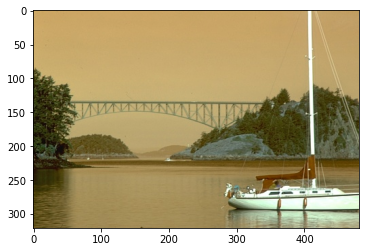

In [ ]:
plt.imshow(img)
plt.show()

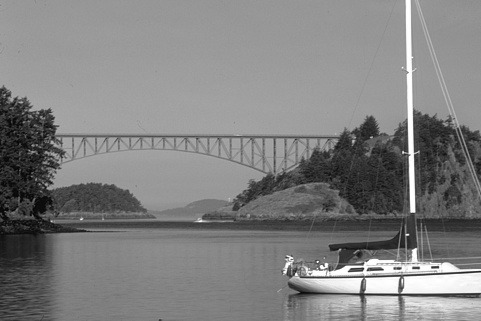

In [ ]:
cv2_imshow(gray)
plt.show()

In [ ]:
# %%timeit -n5 -r5
gmm = GMM(n_components = 6,covariance_type = "tied")
gmm.fit(mod_data)
gmm_labels = gmm.predict(mod_data)
gmm_segmented = gmm_labels.reshape(org_data.shape[0],org_data.shape[1])


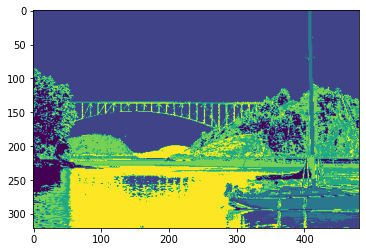

0.4404119665560524
0.6976036951490925
0.30310343072619295


In [ ]:
plt.imshow(gmm_segmented)
plt.show()

print(davies_bouldin_score(mod_data, gmm_labels))
print(silhouette_score(mod_data, gmm_labels))
print(rand_score(mod_data1, gmm_labels))
print(homogeneity_score(mod_data1, gmm_labels))



In [ ]:
# %%timeit -n5 -r5
kmeans = KMeans(n_clusters = 6)
kmeans.fit(mod_data)
kmeans_labels = kmeans.predict(mod_data)
kmeans_segmented = kmeans_labels.reshape(org_data.shape[0], org_data.shape[1])


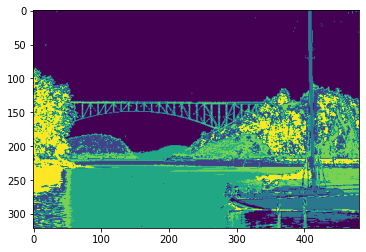

0.44351993603798784
0.712184489882059
0.3097719431325497


In [ ]:
plt.imshow(kmeans_segmented)
plt.show()

print(davies_bouldin_score(mod_data, kmeans_labels))
print(silhouette_score(mod_data, kmeans_labels))
print(rand_score(mod_data1, kmeans_labels))
print(homogeneity_score(mod_data1, kmeans_labels))

In [ ]:
# %%timeit -n5 -r5
# Fuzzy KMeans
from fcmeans import FCM
fcm_model = FCM(n_clusters=6) 
fcm_model.fit(mod_data)
fcm_model_labels = fcm_model.predict(mod_data)
fcm_segmented = fcm_model_labels.reshape(org_data.shape[0], org_data.shape[1])

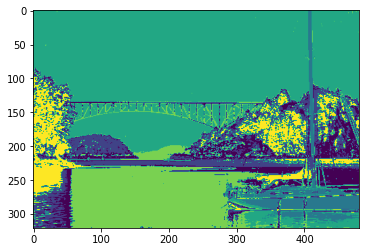

0.44128595985131197
0.7122987156147778
0.3099593853915854


In [ ]:
plt.imshow(fcm_segmented)
plt.show()

print(davies_bouldin_score(mod_data, fcm_model_labels))
print(silhouette_score(mod_data, fcm_model_labels))
print(rand_score(mod_data1, fcm_model_labels))
print(homogeneity_score(mod_data1, fcm_model_labels))

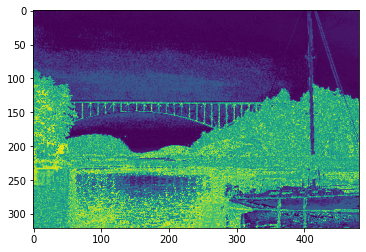

2.9091147124546137


In [ ]:
# plt.imshow(dbscan_segmented)
# plt.show()

# print(davies_bouldin_score(mod_data, dbscan_labels))
# print(silhouette_score(mod_data, dbscan_labels))
# print(rand_score(mod_data1, dbscan_labels))
# print(homogeneity_score(mod_data1, dbscan_labels))